# Exploratory Data Analysis (EDA):

In [1]:
import pandas as pd
df = pd.read_csv('wine.csv')
print(df.head())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


In [2]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None
             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  17

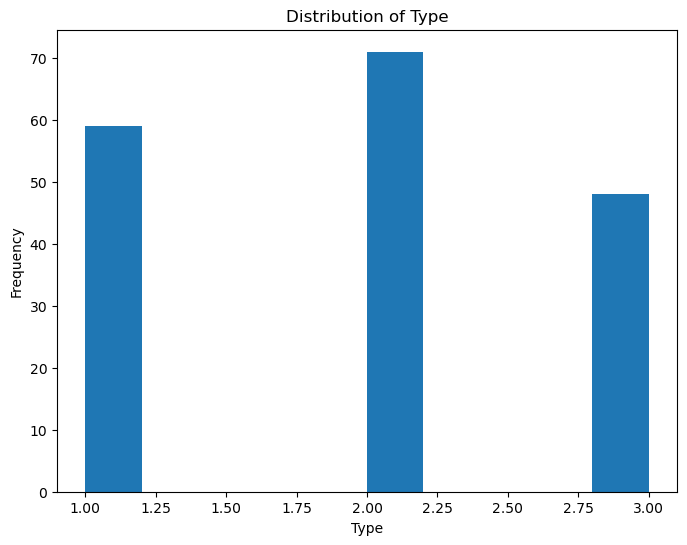

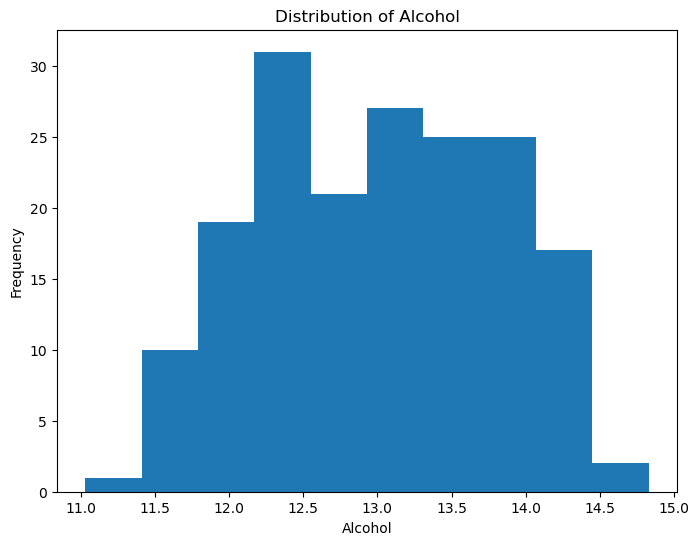

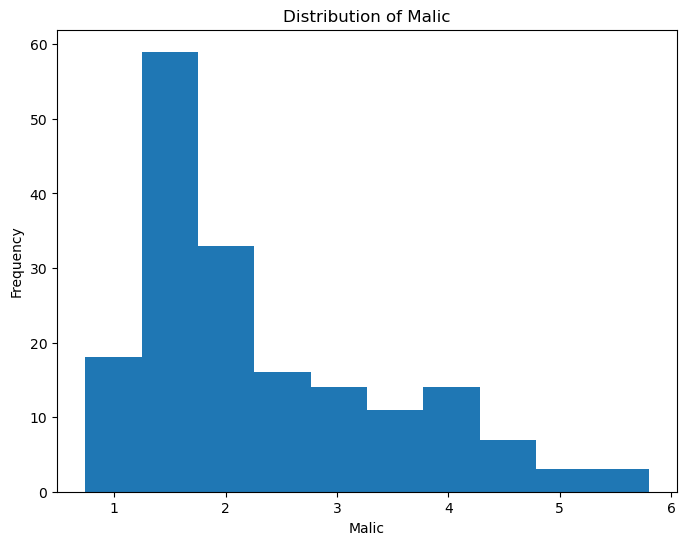

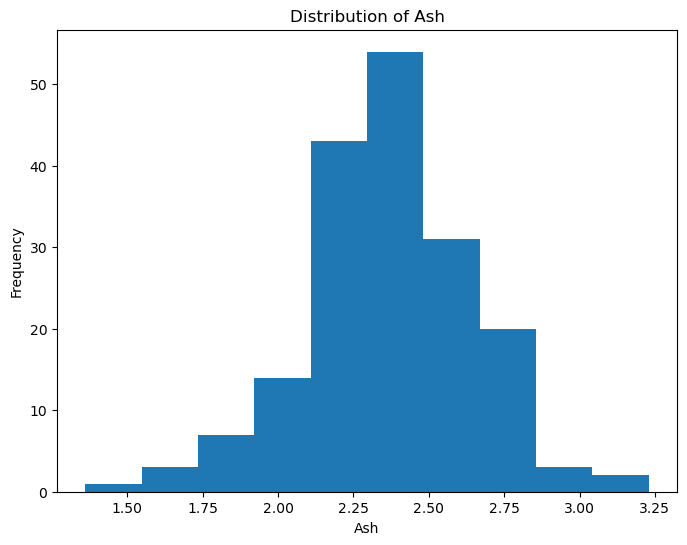

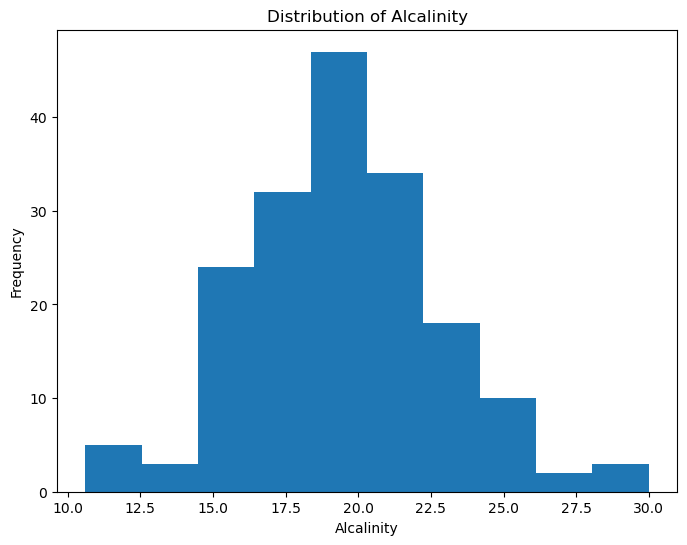

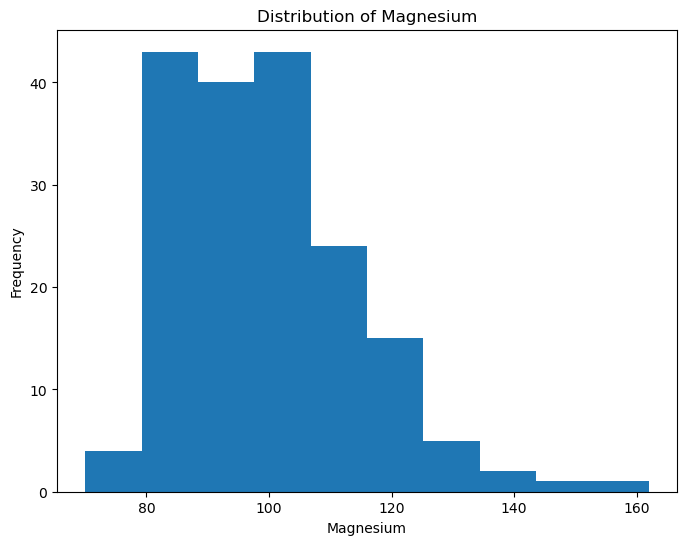

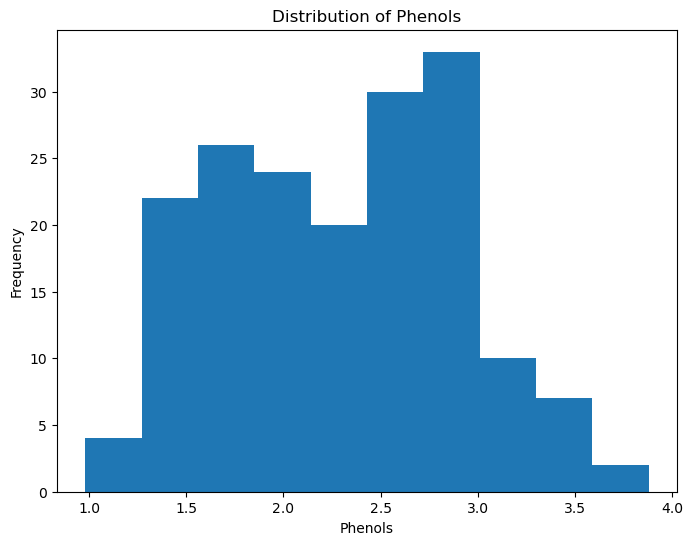

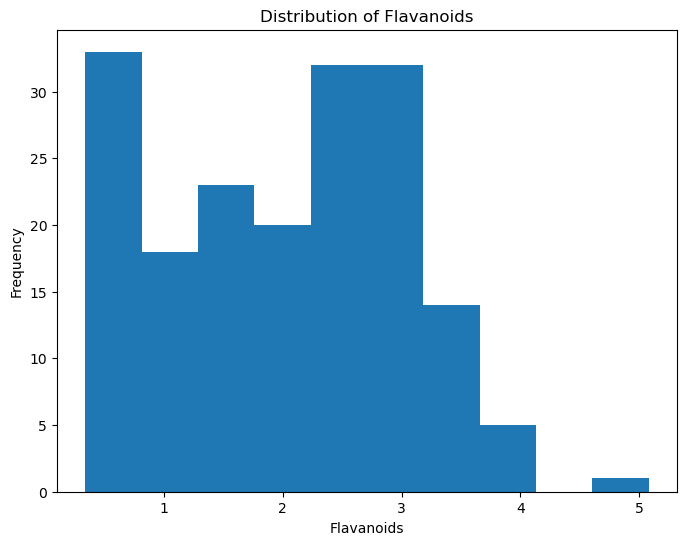

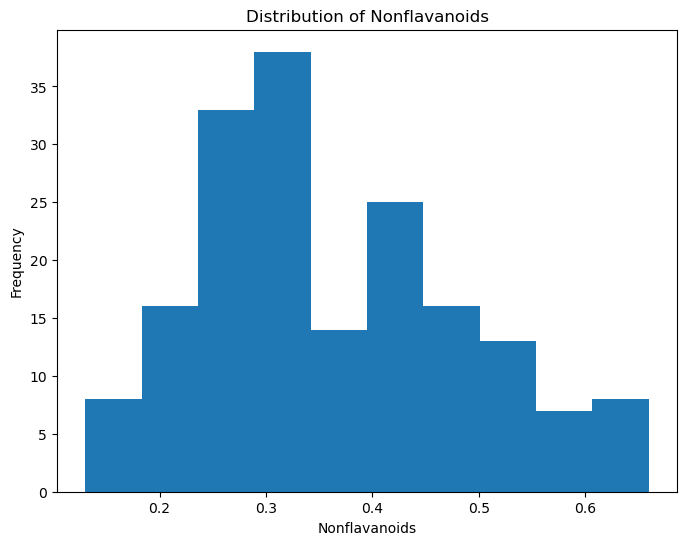

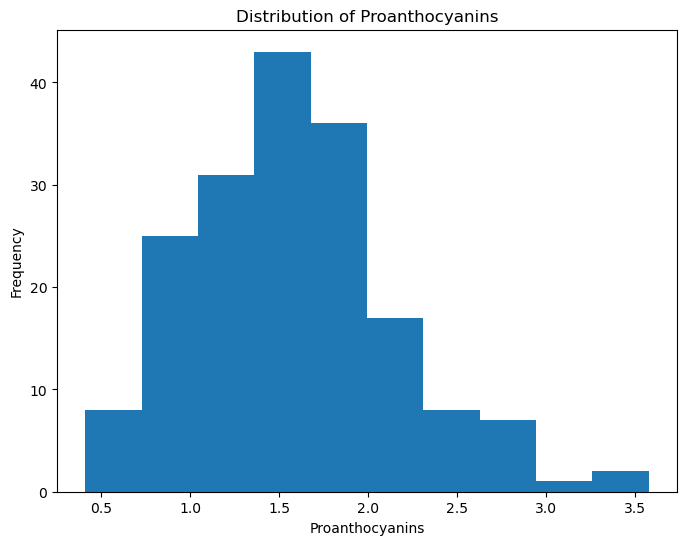

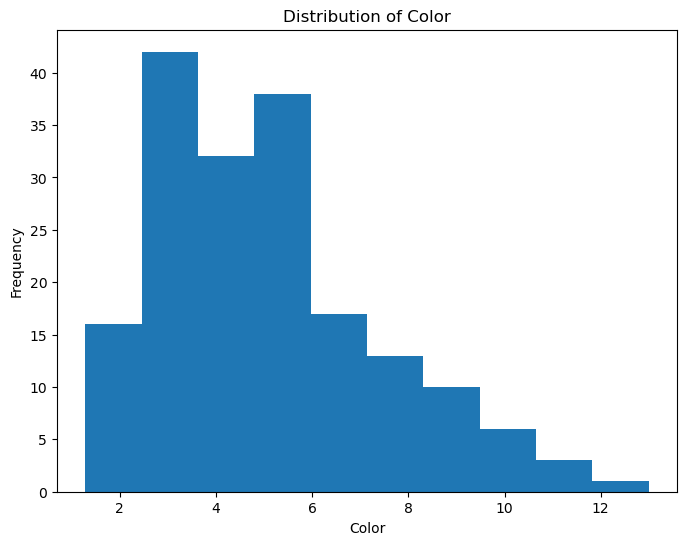

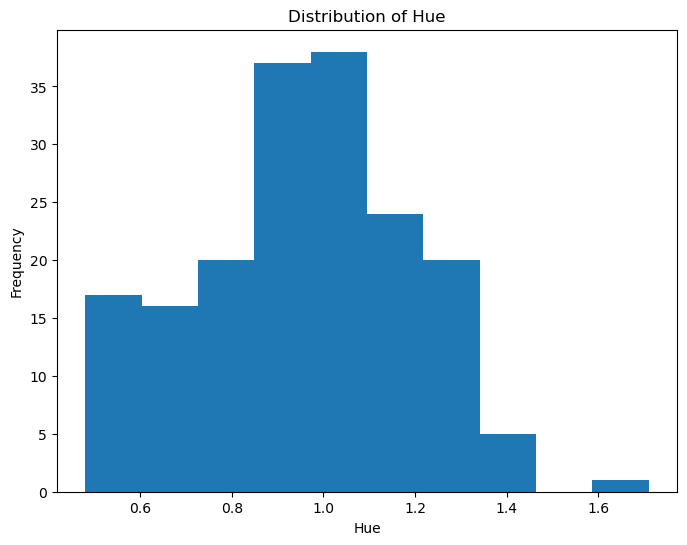

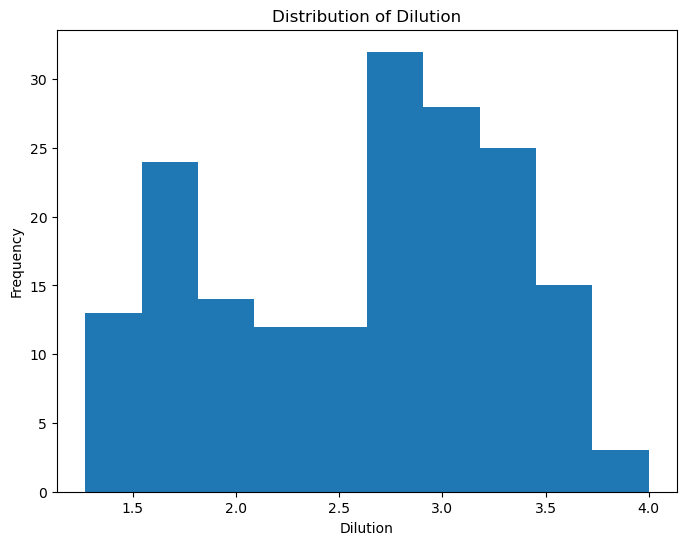

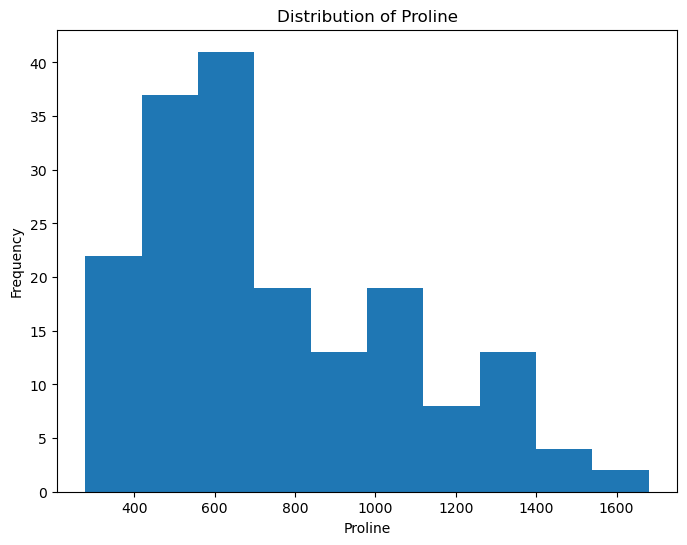

In [3]:
import matplotlib.pyplot as plt

for column in df.columns:
    plt.figure(figsize=(8, 6))
    df[column].hist()
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

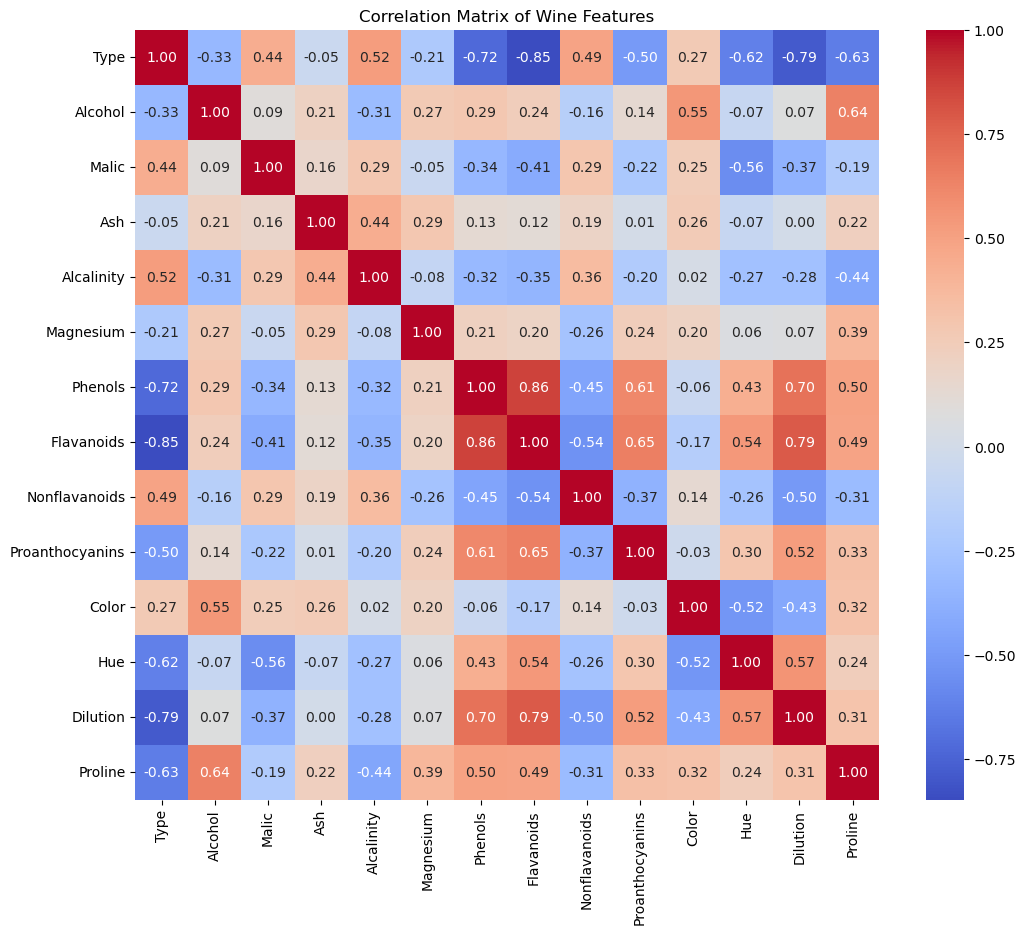

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Wine Features')
plt.show()

# Dimensionality Reduction with PCA:

In [5]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to standardize (excluding 'Type')
features_to_scale = df.drop(columns=['Type']).columns

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit and transform the selected numerical features
df_scaled_features = scaler.fit_transform(df[features_to_scale])

# Create a new DataFrame with scaled features, maintaining original column names
df_scaled = pd.DataFrame(df_scaled_features, columns=features_to_scale)

# Add the 'Type' column back to the scaled DataFrame
df_scaled['Type'] = df['Type']

print("Original DataFrame head:")
print(df.head())
print("\nScaled DataFrame head (excluding 'Type' from scaling):")
print(df_scaled.head())
print("\nDescriptive statistics of scaled features:")
print(df_scaled[features_to_scale].describe())

Original DataFrame head:
   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  

Scaled DataFrame head (excluding 'Type' from scaling):
    Alcohol     Malic       Ash  Alcalinity  Mag

In [6]:
from sklearn.decomposition import PCA

# Instantiate PCA without specifying n_components to get all components
pca = PCA()

# Fit PCA to the scaled features (excluding 'Type')
pca.fit(df_scaled_features)

print("PCA model fitted successfully.")

PCA model fitted successfully.


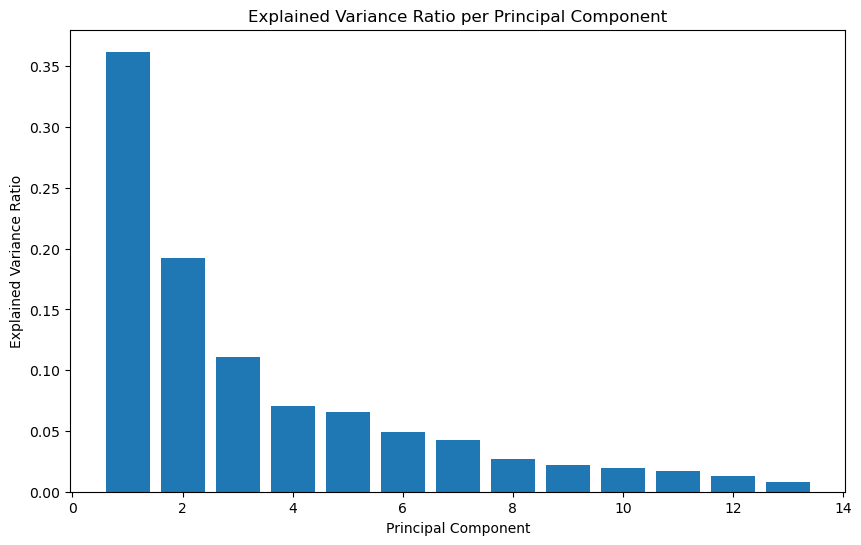

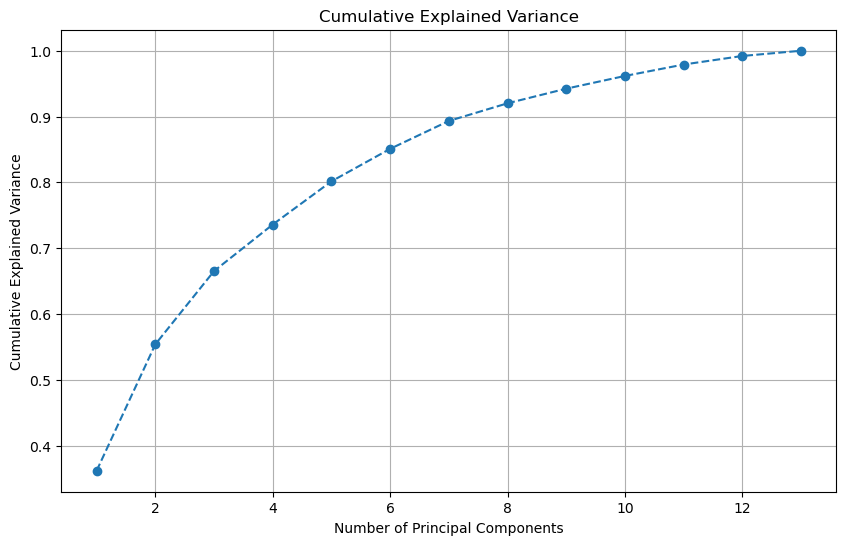

Explained variance ratio for each component:
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

Cumulative explained variance:
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component')
plt.show()

# Plot the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

print("Explained variance ratio for each component:")
print(explained_variance_ratio)
print("\nCumulative explained variance:")
print(cumulative_explained_variance)

In [8]:
pca_transformed_data = pca.transform(df_scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data = pca_transformed_data, columns = [f'PC{i+1}' for i in range(pca_transformed_data.shape[1])])

# Add the 'Type' column back to the PCA DataFrame
pca_df['Type'] = df['Type']

print("First 5 rows of PCA transformed data:")
print(pca_df.head())

First 5 rows of PCA transformed data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043  0.223880  0.596427   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655  0.927120  0.053776   
2  2.516740  1.031151  0.982819  0.724902 -0.251033 -0.549276  0.424205   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842 -0.114431 -0.383337   
4  1.008908  0.869831  2.026688 -0.409766  0.298458  0.406520  0.444074   

        PC8       PC9      PC10      PC11      PC12      PC13  Type  
0 -0.065139 -0.641443  1.020956 -0.451563  0.540810 -0.066239     1  
1 -1.024416  0.308847  0.159701 -0.142657  0.388238  0.003637     1  
2  0.344216  1.177834  0.113361 -0.286673  0.000584  0.021717     1  
3 -0.643593 -0.052544  0.239413  0.759584 -0.242020 -0.369484     1  
4 -0.416700 -0.326819 -0.078366 -0.525945 -0.216664 -0.079364     1  


In [9]:
from sklearn.decomposition import PCA
import pandas as pd

# Instantiate PCA with 5 components
pca_5_components = PCA(n_components=5)

# Fit PCA to the scaled features and transform the data
pca_transformed_data_5 = pca_5_components.fit_transform(df_scaled_features)

# Create a new DataFrame with the principal components
pca_df_5_components = pd.DataFrame(data = pca_transformed_data_5, 
                                 columns = [f'PC{i+1}' for i in range(pca_transformed_data_5.shape[1])])

# Add the 'Type' column back to the PCA DataFrame
pca_df_5_components['Type'] = df['Type']

print("First 5 rows of PCA transformed data with 5 components:")
print(pca_df_5_components.head())

First 5 rows of PCA transformed data with 5 components:
        PC1       PC2       PC3       PC4       PC5  Type
0  3.316751  1.443463 -0.165739 -0.215631  0.693043     1
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655     1
2  2.516740  1.031151  0.982819  0.724902 -0.251033     1
3  3.757066  2.756372 -0.176192  0.567983 -0.311842     1
4  1.008908  0.869831  2.026688 -0.409766  0.298458     1


# Clustering with Original Data:


In [10]:
from sklearn.cluster import KMeans

# Instantiate KMeans with 3 clusters and a random state for reproducibility
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Fit KMeans to the standardized features (excluding 'Type')
kmeans.fit(df_scaled_features)

# Add the cluster labels to the pca_df_5_components DataFrame
pca_df_5_components['Cluster'] = kmeans.labels_

print("First 5 rows of PCA transformed data with cluster labels:")
print(pca_df_5_components.head())

First 5 rows of PCA transformed data with cluster labels:
        PC1       PC2       PC3       PC4       PC5  Type  Cluster
0  3.316751  1.443463 -0.165739 -0.215631  0.693043     1        2
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655     1        2
2  2.516740  1.031151  0.982819  0.724902 -0.251033     1        2
3  3.757066  2.756372 -0.176192  0.567983 -0.311842     1        2
4  1.008908  0.869831  2.026688 -0.409766  0.298458     1        2


C:\Users\Likitha\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


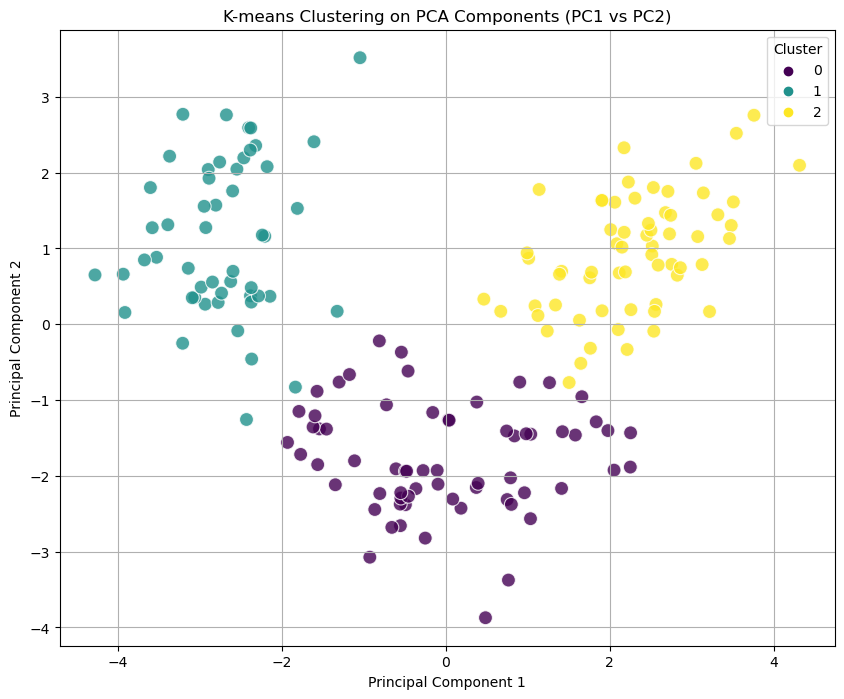

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df_5_components, palette='viridis', s=100, alpha=0.8)
plt.title('K-means Clustering on PCA Components (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [12]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(df_scaled_features, pca_df_5_components['Cluster'])

print(f"The silhouette score for the K-means clustering is: {silhouette_avg:.2f}")

The silhouette score for the K-means clustering is: 0.28


# 4: Clustering with PCA Data:

In [13]:
from sklearn.cluster import KMeans

# Select the principal components from pca_df_5_components for clustering
pca_features_for_clustering = pca_df_5_components.loc[:, 'PC1':'PC5']

# Instantiate KMeans with 3 clusters and a random state for reproducibility
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init='auto')

# Fit KMeans to the selected principal components
kmeans_pca.fit(pca_features_for_clustering)

# Assign the generated cluster labels to a new column named 'Cluster_PCA_data' in the pca_df_5_components DataFrame
pca_df_5_components['Cluster_PCA_data'] = kmeans_pca.labels_

print("First 5 rows of PCA transformed data with new PCA-based cluster labels:")
print(pca_df_5_components.head())

First 5 rows of PCA transformed data with new PCA-based cluster labels:
        PC1       PC2       PC3       PC4       PC5  Type  Cluster  \
0  3.316751  1.443463 -0.165739 -0.215631  0.693043     1        2   
1  2.209465 -0.333393 -2.026457 -0.291358 -0.257655     1        2   
2  2.516740  1.031151  0.982819  0.724902 -0.251033     1        2   
3  3.757066  2.756372 -0.176192  0.567983 -0.311842     1        2   
4  1.008908  0.869831  2.026688 -0.409766  0.298458     1        2   

   Cluster_PCA_data  
0                 2  
1                 2  
2                 2  
3                 2  
4                 2  


C:\Users\Likitha\anaconda3\New folder\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


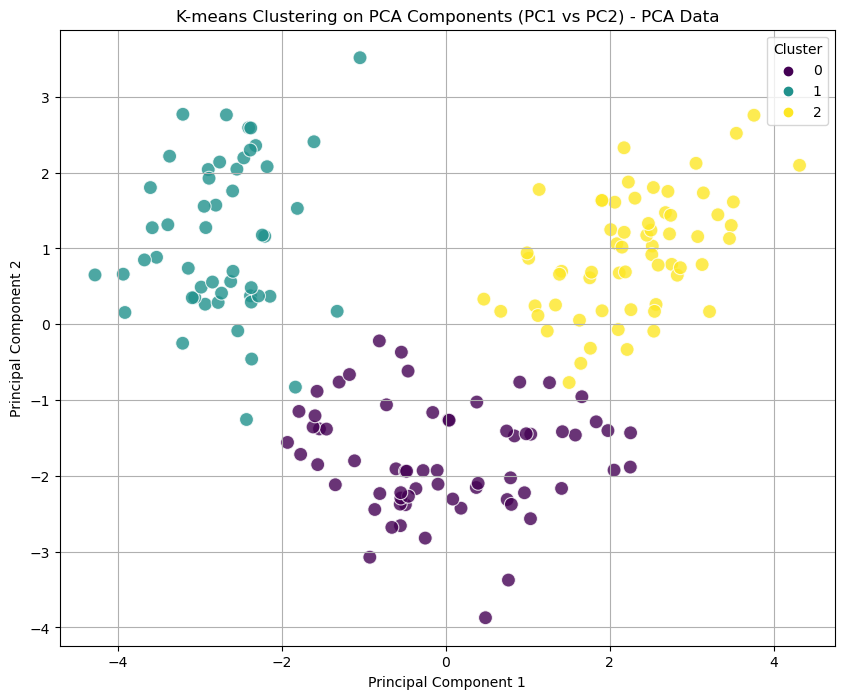

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster_PCA_data', data=pca_df_5_components, palette='viridis', s=100, alpha=0.8)
plt.title('K-means Clustering on PCA Components (PC1 vs PC2) - PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [15]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for PCA-based clustering
silhouette_avg_pca = silhouette_score(pca_features_for_clustering, pca_df_5_components['Cluster_PCA_data'])

print(f"The silhouette score for the K-means clustering on PCA data is: {silhouette_avg_pca:.2f}")

The silhouette score for the K-means clustering on PCA data is: 0.37


#  Comparison and Analysis:

In [16]:
import pandas as pd

# 1. Cross-tabulation between 'Cluster' (K-means on standardized features) and 'Type'
print("Cross-tabulation: K-means on Standardized Features vs. Original Type\n")
crosstab_cluster_vs_type = pd.crosstab(pca_df_5_components['Cluster'], pca_df_5_components['Type'])
print(crosstab_cluster_vs_type)
print("\n" + "-" * 50 + "\n")

# 2. Cross-tabulation between 'Cluster_PCA_data' (K-means on PCA-transformed features) and 'Type'
print("Cross-tabulation: K-means on PCA Data vs. Original Type\n")
crosstab_pca_cluster_vs_type = pd.crosstab(pca_df_5_components['Cluster_PCA_data'], pca_df_5_components['Type'])
print(crosstab_pca_cluster_vs_type)
print("\n" + "-" * 50 + "\n")

# 3. Cross-tabulation between 'Cluster' and 'Cluster_PCA_data'
print("Cross-tabulation: K-means on Standardized Features vs. K-means on PCA Data\n")
crosstab_cluster_vs_pca_cluster = pd.crosstab(pca_df_5_components['Cluster'], pca_df_5_components['Cluster_PCA_data'])
print(crosstab_cluster_vs_pca_cluster)

Cross-tabulation: K-means on Standardized Features vs. Original Type

Type      1   2   3
Cluster            
0         0  65   0
1         0   3  48
2        59   3   0

--------------------------------------------------

Cross-tabulation: K-means on PCA Data vs. Original Type

Type               1   2   3
Cluster_PCA_data            
0                  0  65   0
1                  0   3  48
2                 59   3   0

--------------------------------------------------

Cross-tabulation: K-means on Standardized Features vs. K-means on PCA Data

Cluster_PCA_data   0   1   2
Cluster                     
0                 65   0   0
1                  0  51   0
2                  0   0  62


In [17]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Get true labels
true_labels = pca_df_5_components['Type']

# 1. Evaluate K-means on Standardized Features
cluster_labels_standardized = pca_df_5_components['Cluster']
ari_standardized = adjusted_rand_score(true_labels, cluster_labels_standardized)
nmi_standardized = normalized_mutual_info_score(true_labels, cluster_labels_standardized)

print(f"Adjusted Rand Index (ARI) for K-means on standardized features: {ari_standardized:.2f}")
print(f"Normalized Mutual Information (NMI) for K-means on standardized features: {nmi_standardized:.2f}")

print("\n" + "-" * 50 + "\n")

# 2. Evaluate K-means on PCA-transformed Features
cluster_labels_pca = pca_df_5_components['Cluster_PCA_data']
ari_pca = adjusted_rand_score(true_labels, cluster_labels_pca)
nmi_pca = normalized_mutual_info_score(true_labels, cluster_labels_pca)

print(f"Adjusted Rand Index (ARI) for K-means on PCA-transformed features: {ari_pca:.2f}")
print(f"Normalized Mutual Information (NMI) for K-means on PCA-transformed features: {nmi_pca:.2f}")

Adjusted Rand Index (ARI) for K-means on standardized features: 0.90
Normalized Mutual Information (NMI) for K-means on standardized features: 0.88

--------------------------------------------------

Adjusted Rand Index (ARI) for K-means on PCA-transformed features: 0.90
Normalized Mutual Information (NMI) for K-means on PCA-transformed features: 0.88


# Conclusion and Insights:

In [18]:
## Comprehensive Summary of Key Findings and Insights

#PCA had a highly beneficial impact on clustering performance for this dataset. It enabled a significant **dimensionality reduction** (from 13 to 5 features), which likely improved **computational efficiency**. Crucially, it led to a higher **clustering quality** (as evidenced by the increased silhouette score from 0.28 to 0.37), indicating more coherent and better-separated clusters. This was achieved while **preserving the essential grouping structure** of the data, as both approaches yielded identical cluster assignments and equally high alignment with the true wine types (ARI = 0.90, NMI = 0.88). The trade-off was a slight reduction in direct interpretability due to the abstract nature of principal components, but the gains in efficiency and clustering robustness highlight the value of PCA in this context.